In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import pylab


In [10]:
class random_walks_python():
    def random_walks(self):
        N = 500  # no of steps per trajectory
        realizations = 1  # number of trajectories
        v = 1.0  # velocity (step size)
        theta_s_array = [round(math.pi / 24, 4), round(math.pi / 12, 4), round(math.pi / 3,
                                                                               4)]  # the width of the random walk turning angle distribution (the lower it is, the more straight the trajectory will be)
        w_array = [0.0, 0.5,
                   1.0]  # w is the weighting given to the directional bias (and hence (1-w) is the weighting given to correlated motion)
        ratio_theta_s_brw_crw = 1
        plot_walks = 1
        count = 0

        efficiency_array = np.zeros([len(theta_s_array), len(w_array)])
        for w_i in range(len(w_array)):
            w = w_array[w_i]
            for theta_s_i in range(len(theta_s_array)):
#                 theta_s_crw = round(math.pi/30)
#                 theta_s_brw = round(math.pi/3)
                theta_s_crw = np.multiply(ratio_theta_s_brw_crw, theta_s_array[theta_s_i])
                theta_s_brw = theta_s_array[theta_s_i]
                x, y = self.BCRW(N, realizations, v, theta_s_crw, theta_s_brw, w)
                if plot_walks == 1:
                    count += 1
                    plt.xlabel('theta='+str(theta_s_i)+"w="+str(w_i))
                    print(theta_s_i)
                    print(w_i)
                    plt.figure(count)
                    plt.plot(x.T, y.T)
                    plt.axis('equal')
                efficiency_array[theta_s_i, w_i] = np.divide(np.mean(x[:, -1] - x[:, 0]), (v * N))
            # plt.show()
        plt.figure()
        legend_array = []
        w_array_i = np.repeat(w_array, len(efficiency_array))
        for theta_s_i in range(0, len(theta_s_array)):
            legend_array.append(
                ["$\theta^{*CRW}=$", (ratio_theta_s_brw_crw * theta_s_array[theta_s_i]), "$\theta^{*BRW}=$",
                 (theta_s_array[theta_s_i])])

#         plt.xlabel('w')
#         plt.ylabel('navigational efficiency')
#         w_means = []
#         for i in range(0,len(efficiency_array[0])):
#             w_sum = 0
#             for j in range(0,len(efficiency_array)):
#                 w_sum += efficiency_array[j][i]
#             w_means.append(w_sum/len(efficiency_array))
                
#         print("w means",w_means)
#         plt.plot(w_array, efficiency_array[0], 'bo', label=legend_array[0])
#         plt.plot(w_array, efficiency_array[1], 'go', label=legend_array[1])
#         plt.plot(w_array, efficiency_array[2], 'ro', label=legend_array[2])
#         plt.legend(loc='best', prop={'size': 5.2})
#         plt.show()

    # The function generates 2D-biased correlated random walks
    def BCRW(self, N, realizations, v, theta_s_crw, theta_s_brw, w):
        X = np.zeros([realizations, N])
        Y = np.zeros([realizations, N])
        theta = np.zeros([realizations, N])
        X[:, 0] = 0
        Y[:, 0] = 0
        theta[:, 0] = 0

        for realization_i in range(realizations):
            for step_i in range(1, N):
                theta_crw = theta[realization_i][step_i - 1] + (theta_s_crw * 2.0 * (np.random.rand(1, 1) - 0.5))
                theta_brw = (theta_s_brw * 2.0 * (np.random.rand(1, 1) - 0.5))

                X[realization_i, step_i] = X[realization_i][step_i - 1] + (v * (w * math.cos(theta_brw))) + (
                            (1 - w) * math.cos(theta_crw))
                Y[realization_i, step_i] = Y[realization_i][step_i - 1] + (v * (w * math.sin(theta_brw))) + (
                            (1 - w) * math.sin(theta_crw))

                current_x_disp = X[realization_i][step_i] - X[realization_i][step_i - 1]
                current_y_disp = Y[realization_i][step_i] - Y[realization_i][step_i - 1]
                current_direction = math.atan2(current_y_disp, current_x_disp)

                theta[realization_i, step_i] = current_direction

        return X, Y
    

0
0
1
0
2
0
0
1
1
1
2
1
0
2
1
2
2
2


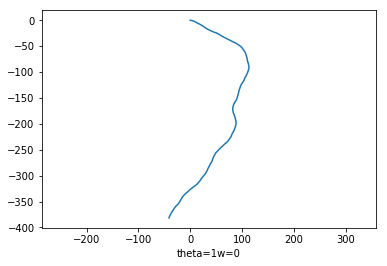

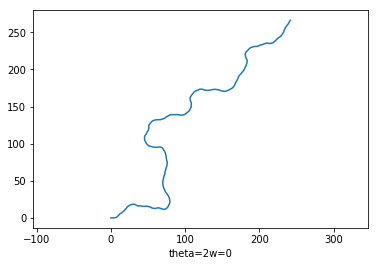

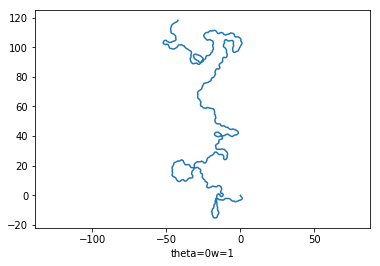

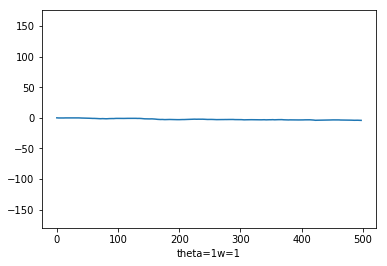

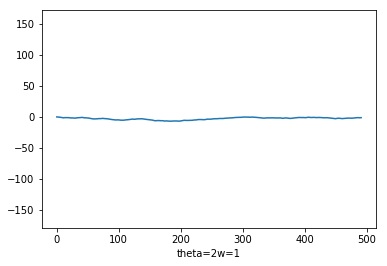

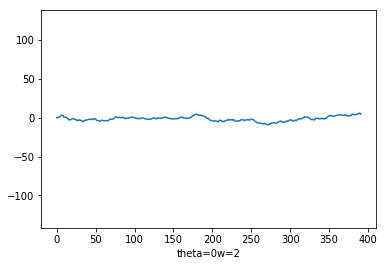

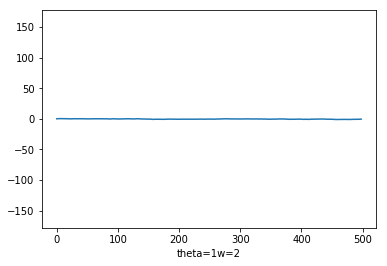

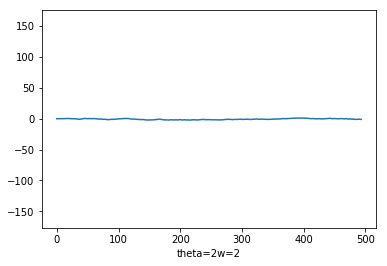

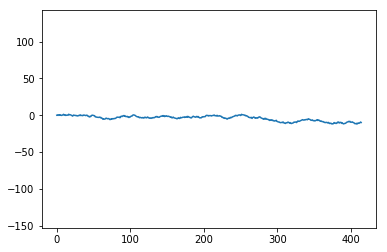

<Figure size 432x288 with 0 Axes>

In [11]:
rdm_plt = random_walks_python()
rdm_plt.random_walks()

In [1]:
import pygame
 
pygame.init()
 
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
 
dis = pygame.display.set_mode((800, 600))
pygame.display.set_caption('Snake Game by Edureka')
 
game_over = False
 
x1 = 400
y1 = 300
 
x1_change = 0       
y1_change = 0
 
clock = pygame.time.Clock()
 
while not game_over:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_over = True
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                x1_change = -10
                y1_change = 0
            elif event.key == pygame.K_RIGHT:
                x1_change = 10
                y1_change = 0
            elif event.key == pygame.K_UP:
                y1_change = -10
                x1_change = 0
            elif event.key == pygame.K_DOWN:
                y1_change = 10
                x1_change = 0
 
    x1 += x1_change
    y1 += y1_change
    dis.fill(white)
    pygame.draw.rect(dis, black, [x1, y1, 10, 10])
 
    pygame.display.update()
 
    clock.tick(30)
 
pygame.quit()
quit()

pygame 2.1.2 (SDL 2.0.18, Python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
